# Trail Recommendations

## (Recommendation model here)

In [1]:
import pandas as pd
import numpy as np
import pgeocode # pip3 install pgeocode
import geopy.distance # pip3 install geopy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Build the model after the preprocessing of the dataset

### Read the file and view the basic info

In [2]:
df_raw = pd.read_csv('combined-trails-w-weather.csv.zip', compression='zip')
df_raw.head()

/var/folders/rj/ltb_h3dn55jbxjk2_5f94x9r0000gn/T/ipykernel_4568/2189773313.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('combined-trails-w-weather.csv.zip', compression='zip')


,Unnamed: 0.1,Unnamed: 0,title,riding area,rating,distance,descent,climb,popularity_score,TITLE,...,RATING_COUNT,LATITUDE,LONGITUDE,REPORT_DATE,REPORT_COUNT,URL,title_wta,Period,Check-Ins,weather
0,0,0,pyramid-mountain,Port Angeles,NaN,3 miles,-283 ft,"2,671 ft",0,Pyramid Mountain,...,4,48.018056,-120.505278,2020-08-01,44,https://www.wta.org/go-hiking/hikes/pyramid-mo...,pyramid-mountain,11am,2,Clear
1,1,1,pyramid-mountain,Port Angeles,NaN,3 miles,-283 ft,"2,671 ft",0,Pyramid Mountain,...,4,48.018056,-120.505278,2020-08-01,44,https://www.wta.org/go-hiking/hikes/pyramid-mo...,pyramid-mountain,3pm,3,Clear
2,2,2,pyramid-mountain,Port Angeles,NaN,3 miles,-283 ft,"2,671 ft",0,Pyramid Mountain,...,4,48.018056,-120.505278,2020-08-01,44,https://www.wta.org/go-hiking/hikes/pyramid-mo...,pyramid-mountain,4pm,2,Clear
3,3,3,pyramid-mountain,Port Angeles,NaN,3 miles,-283 ft,"2,671 ft",0,Pyramid Mountain,...,4,48.018056,-120.505278,2020-08-01,44,https://www.wta.org/go-hiking/hikes/pyramid-mo...,pyramid-mountain,7pm,1,Clear
4,4,4,pyramid-mountain,Port Angeles,NaN,3 miles,-283 ft,"2,671 ft",0,Pyramid Mountain,...,4,48.018056,-120.505278,2020-08-01,44,https://www.wta.org/go-hiking/hikes/pyramid-mo...,pyramid-mountain,May,2,Clear


In [3]:
df_raw.shape

(3444752, 26)

In [4]:
df_raw.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
title                object
riding area          object
rating              float64
distance             object
descent              object
climb                object
popularity_score      int64
TITLE                object
REGION               object
DISTANCE            float64
DIST_TYPE            object
GAIN                float64
HIGHEST             float64
RATING              float64
RATING_COUNT          int64
LATITUDE            float64
LONGITUDE           float64
REPORT_DATE          object
REPORT_COUNT          int64
URL                  object
title_wta            object
Period               object
Check-Ins             int64
weather              object
dtype: object

In [5]:
df_raw.isna().sum()

Unnamed: 0.1              0
Unnamed: 0                0
title                     0
riding area             493
rating              3444752
distance               8940
descent              419047
climb                536850
popularity_score          0
TITLE                     0
REGION                    0
DISTANCE             271845
DIST_TYPE            271845
GAIN                1694439
HIGHEST             1681778
RATING                    0
RATING_COUNT              0
LATITUDE                  0
LONGITUDE                 0
REPORT_DATE           35090
REPORT_COUNT              0
URL                       0
title_wta                 0
Period                    0
Check-Ins                 0
weather               35090
dtype: int64

### Remove irrelevant/duplicated features and NA values

In [6]:
feature_kept = ['TITLE', 'REGION', 'LATITUDE', 'LONGITUDE', 'URL', 'riding area', \
                'distance', 'descent', 'climb', 'popularity_score', 'GAIN', 'HIGHEST', \
                    'RATING', 'RATING_COUNT', 'Period', 'Check-Ins', 'weather']
df = df_raw[feature_kept]
df.dropna(inplace=True)
df.head(20)

/var/folders/rj/ltb_h3dn55jbxjk2_5f94x9r0000gn/T/ipykernel_4568/2904027074.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,TITLE,REGION,LATITUDE,LONGITUDE,URL,riding area,distance,descent,climb,popularity_score,GAIN,HIGHEST,RATING,RATING_COUNT,Period,Check-Ins,weather
0,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,11am,2,Clear
1,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,3pm,3,Clear
2,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,4pm,2,Clear
3,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,7pm,1,Clear
4,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,May,2,Clear
5,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,Jun,4,Clear
6,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,Jul,1,Clear
7,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,Aug,1,Clear
8,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,2021,4,Clear
9,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,2022,4,Clear


In [7]:
df.shape

(1284083, 17)

In [8]:
# function to get the distance from two pairs of (lat, long)
def getDistFromLatLong(coord1, corrd2):
    '''
    Input: 
        coord1 : (lat, long) tuple
        coord2 : (lat, long) tuple
    
    Output:
        distance : int (in miles)
    '''
    return geopy.distance.geodesic(coord1, corrd2).miles

# test
nomi = nomi = pgeocode.Nominatim('us')
lat1, long1 = nomi.query_postal_code(str(28269))["latitude"], nomi.query_postal_code(str(28269))["longitude"]
lat2, long2 = nomi.query_postal_code(str(27006))["latitude"], nomi.query_postal_code(str(27006))["longitude"]
print(getDistFromLatLong((lat1, long1), (lat2, long2)))

53.795927481773894


### K-means clustering of coordinates (latitude & longitude)

In [9]:
# number of clusters = number of regions (k=11);
k = int(df[['REGION']].nunique())
kmeans = KMeans(n_clusters=k, init ='k-means++')
kmeans.fit(df[['LATITUDE', 'LONGITUDE']]) # Compute k-means clustering.
df['coord_label'] = kmeans.fit_predict(df[['LATITUDE', 'LONGITUDE']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df[['LATITUDE', 'LONGITUDE']]) # Labels of each point
df.head(10)

/var/folders/rj/ltb_h3dn55jbxjk2_5f94x9r0000gn/T/ipykernel_4568/1718707189.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['coord_label'] = kmeans.fit_predict(df[['LATITUDE', 'LONGITUDE']])


,TITLE,REGION,LATITUDE,LONGITUDE,URL,riding area,distance,descent,climb,popularity_score,GAIN,HIGHEST,RATING,RATING_COUNT,Period,Check-Ins,weather,coord_label
0,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,11am,2,Clear,8
1,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,3pm,3,Clear,8
2,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,4pm,2,Clear,8
3,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,7pm,1,Clear,8
4,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,May,2,Clear,8
5,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,Jun,4,Clear,8
6,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,Jul,1,Clear,8
7,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,Aug,1,Clear,8
8,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,2021,4,Clear,8
9,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,2022,4,Clear,8


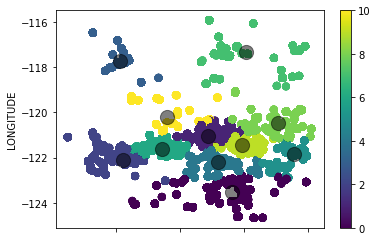

In [10]:
df.plot.scatter(x='LATITUDE', y='LONGITUDE', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [11]:
centers

array([[  47.81171144, -123.52337153],
       [  47.435839  , -121.03029601],
       [  46.10419556, -122.0944919 ],
       [  46.06080485, -117.72907885],
       [  47.60085579, -122.18110651],
       [  48.78464167, -121.82508411],
       [  46.71802979, -121.6233253 ],
       [  48.02762163, -117.35821284],
       [  48.54191591, -120.49183889],
       [  47.9706572 , -121.46859173],
       [  46.79393073, -120.23146968]])

In [12]:
print("max latitude: ", float(np.max(df[['LATITUDE']], axis=0)), end = "\t")
print("min latitude: ", float(np.min(df[['LATITUDE']], axis=0)))
print("max longitude: ", float(np.max(df[['LONGITUDE']], axis=0)), end = "\t")
print("min longitude: ", float(np.min(df[['LONGITUDE']], axis=0)))

max latitude:  49.0569933148	min latitude:  45.244154864
max longitude:  -115.936017036	min longitude:  -124.668728092


In [13]:
# distances between each pair of centeroids
centerDists = []
for i in range(len(centers)):
    for j in range(i+1, len(centers)):
        if (i != j): centerDists.append(getDistFromLatLong(centers[i], centers[j]))
len(centerDists)

55

In [14]:
print("min distance: ", min(centerDists))
print("max distance: ", max(centerDists))

min distance:  41.873092652447745
max distance:  299.5512381960446


### Filter out the trails that satisfies the constraints from user inputs

#### Sample user input

In [15]:
# sample input from user
zipcode = 98063 # should be in Washington
radius = 20 # in miles (Min = 10 miles, max = 40 miles)
hour_of_day = 15 # 3pm

#### Find the corresponding cluster region and select trails within that cluster

In [16]:
# find the center that is nearest to the current coordinate
coord = nomi.query_postal_code(str(zipcode))["latitude"], nomi.query_postal_code(str(zipcode))["longitude"]
nearestCenterLabel, nearestDist = None, float('inf')
for label, center in enumerate(centers):
    currDist = getDistFromLatLong(center, coord)
    if currDist < nearestDist:
        nearestDist = currDist
        nearestCenterLabel = label
df_satisfy = df.loc[df['coord_label'] == nearestCenterLabel]
df_satisfy.head()

,TITLE,REGION,LATITUDE,LONGITUDE,URL,riding area,distance,descent,climb,popularity_score,GAIN,HIGHEST,RATING,RATING_COUNT,Period,Check-Ins,weather,coord_label
87,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,8am,3,Clear,4
88,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,9am,2,Clear,4
89,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,10am,2,Clear,4
90,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,11am,4,Clear,4
91,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,12pm,1,Clear,4


In [17]:
df_satisfy.shape

(192533, 18)

#### Filter out trails that has clear weather

In [18]:
df_satisfy = df_satisfy.loc[df_satisfy['weather'] == "Clear"]
df_satisfy.head(20)

,TITLE,REGION,LATITUDE,LONGITUDE,URL,riding area,distance,descent,climb,popularity_score,GAIN,HIGHEST,RATING,RATING_COUNT,Period,Check-Ins,weather,coord_label
87,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,8am,3,Clear,4
88,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,9am,2,Clear,4
89,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,10am,2,Clear,4
90,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,11am,4,Clear,4
91,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,12pm,1,Clear,4
92,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,1pm,3,Clear,4
93,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,2pm,2,Clear,4
94,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,3pm,2,Clear,4
95,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,4pm,1,Clear,4
96,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,6pm,1,Clear,4


In [19]:
df_satisfy.shape

(97090, 18)

#### Filter out trails that satisfies hour of day constraint

In [20]:
def convertToAMPM(hour):
    '''
    Inputs:
        hour : int (0-23)

    Outputs:    
        hourOfDay : string (AM/PM format time)
    '''
    if hour == 0: return "12am"
    elif hour < 12: return str(hour)+"am"
    elif hour == 12: return "12pm"
    else: return str(hour-12)+"pm"

# tests
assert(convertToAMPM(15) == "3pm")
assert(convertToAMPM(11) == "11am")
assert(convertToAMPM(12) == "12pm")

In [21]:
df_satisfy = df_satisfy[df_satisfy.apply(lambda x: x['Period'] == convertToAMPM(hour_of_day), axis=1)]
df_satisfy.head()

,TITLE,REGION,LATITUDE,LONGITUDE,URL,riding area,distance,descent,climb,popularity_score,GAIN,HIGHEST,RATING,RATING_COUNT,Period,Check-Ins,weather,coord_label
94,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,3pm,2,Clear,4
139,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-39 ft,345 ft,0,550.0,600.0,3.28,25,3pm,2,Clear,4
184,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Sun Mountain,5 miles,"-1,443 ft",685 ft,100,550.0,600.0,3.28,25,3pm,2,Clear,4
53055,Palouse to Cascades Trail - Rattlesnake Lake,Snoqualmie Region,47.434136,-121.770660,https://www.wta.org/go-hiking/hikes/palouse-to...,William O. Douglas Wilderness,13 miles,"-1,069 ft","2,918 ft",0,300.0,1100.0,2.91,11,3pm,253,Clear,4
53909,Rattlesnake Mountain,Snoqualmie Region,47.509203,-121.843357,https://www.wta.org/go-hiking/hikes/rattlesnak...,William O. Douglas Wilderness,13 miles,"-1,069 ft","2,918 ft",0,2520.0,3500.0,3.64,39,3pm,253,Clear,4


In [22]:
df_satisfy.shape

(84, 18)

#### Filter out trails that satisfies radius constraint

In [23]:
df_satisfy = df_satisfy[df_satisfy.apply(lambda x: getDistFromLatLong((x['LATITUDE'], x['LONGITUDE']), coord) <= radius, axis=1)]
df_satisfy = df_satisfy.drop_duplicates(keep="first")
df_satisfy.head(20)

,TITLE,REGION,LATITUDE,LONGITUDE,URL,riding area,distance,descent,climb,popularity_score,GAIN,HIGHEST,RATING,RATING_COUNT,Period,Check-Ins,weather,coord_label
94,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,3pm,2,Clear,4
139,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-39 ft,345 ft,0,550.0,600.0,3.28,25,3pm,2,Clear,4
184,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Sun Mountain,5 miles,"-1,443 ft",685 ft,100,550.0,600.0,3.28,25,3pm,2,Clear,4
68493,Squak Mountain's East Side Loop,Issaquah Alps,47.528416,-122.036304,https://www.wta.org/go-hiking/hikes/squak-moun...,Squak Mountain State Park,2 miles,-247 ft,331 ft,0,1700.0,2025.0,3.00,8,3pm,24,Clear,4
83370,Indian Trail,Puget Sound and Islands,47.451912,-122.379000,https://www.wta.org/go-hiking/hikes/indian-tra...,Glacier Peak Wilderness,11 miles,-201 ft,"2,855 ft",0,32.0,320.0,2.00,2,3pm,68,Clear,4
84120,Indian Trail,Puget Sound and Islands,47.451912,-122.379000,https://www.wta.org/go-hiking/hikes/indian-tra...,William O. Douglas Wilderness,9 miles,"-1,993 ft","1,289 ft",0,32.0,320.0,2.00,2,3pm,68,Clear,4
84870,Indian Trail,Puget Sound and Islands,47.451912,-122.379000,https://www.wta.org/go-hiking/hikes/indian-tra...,Hanging Rock State Park,4 miles,-192 ft,"1,176 ft",0,32.0,320.0,2.00,2,3pm,68,Clear,4
279750,Lakeridge Park,Puget Sound and Islands,47.508594,-122.248237,https://www.wta.org/go-hiking/hikes/lakeridge-...,North Fork Nooksack,"4,708 ft",-171 ft,224 ft,0,144.0,220.0,3.50,2,3pm,564,Clear,4
281814,Lakeridge Park,Puget Sound and Islands,47.508594,-122.248237,https://www.wta.org/go-hiking/hikes/lakeridge-...,North Fork Nooksack,"4,708 ft",-171 ft,224 ft,0,144.0,220.0,3.50,2,3pm,70,Clear,4
2642919,Margaret's Way,Issaquah Alps,47.506573,-122.086652,https://www.wta.org/go-hiking/hikes/margarets-way,Squak Mountain State Park,3 miles,-64 ft,"1,456 ft",0,1500.0,1730.0,3.84,49,3pm,16,Clear,4


In [24]:
df_satisfy.shape

(22, 18)

### Finalize the recommendation using k-means clustering

#### First convert the distance to numeric with same unit (ft)

In [25]:
def convertDist(dist):
    '''
    Inputs:
        dist : string

    Outputs:
        dist_numeric : int (unit:ft)
    '''
    if dist[-4:] == "mile": return 5280 # 1 mile is 5280 ft
    elif dist[-5:] == "miles": return int(dist[:-6])*5280
    else: return int(dist[:-3].replace(',', ''))

# tests
assert(convertDist("1 mile") == 5280)
assert(convertDist("5 miles") == 26400)
assert(convertDist("4,708 ft") == 4708)

In [26]:
df_final = df_satisfy
df_final['distance_ft'] = df_final['distance'].apply(lambda x: convertDist(x))
df_final.head()

,TITLE,REGION,LATITUDE,LONGITUDE,URL,riding area,distance,descent,climb,popularity_score,GAIN,HIGHEST,RATING,RATING_COUNT,Period,Check-Ins,weather,coord_label,distance_ft
94,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,3pm,2,Clear,4,5280
139,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-39 ft,345 ft,0,550.0,600.0,3.28,25,3pm,2,Clear,4,5280
184,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Sun Mountain,5 miles,"-1,443 ft",685 ft,100,550.0,600.0,3.28,25,3pm,2,Clear,4,26400
68493,Squak Mountain's East Side Loop,Issaquah Alps,47.528416,-122.036304,https://www.wta.org/go-hiking/hikes/squak-moun...,Squak Mountain State Park,2 miles,-247 ft,331 ft,0,1700.0,2025.0,3.00,8,3pm,24,Clear,4,10560
83370,Indian Trail,Puget Sound and Islands,47.451912,-122.379000,https://www.wta.org/go-hiking/hikes/indian-tra...,Glacier Peak Wilderness,11 miles,-201 ft,"2,855 ft",0,32.0,320.0,2.00,2,3pm,68,Clear,4,58080


#### Perform k-means clustering based on distance in ft, popularity score, gain, and rating

In [27]:
# k-means clustering based on distance in ft, popularity score, gain, and rating
kmeans = KMeans(n_clusters=3, init ='k-means++')
kmeans.fit(df_final[['distance_ft', 'popularity_score', 'GAIN', 'RATING']]) # Compute k-means clustering.
df_final['final_label'] = kmeans.fit_predict(df_final[['distance_ft', 'popularity_score', 'GAIN', 'RATING']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df_final[['distance_ft', 'popularity_score', 'GAIN', 'RATING']]) # Labels of each point
df_final.head(10)

,TITLE,REGION,LATITUDE,LONGITUDE,URL,riding area,distance,descent,climb,popularity_score,GAIN,HIGHEST,RATING,RATING_COUNT,Period,Check-Ins,weather,coord_label,distance_ft,final_label
94,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-75 ft,198 ft,0,550.0,600.0,3.28,25,3pm,2,Clear,4,5280,1
139,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Cougar Mountain Regional Wildland Park,1 mile,-39 ft,345 ft,0,550.0,600.0,3.28,25,3pm,2,Clear,4,5280,1
184,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Sun Mountain,5 miles,"-1,443 ft",685 ft,100,550.0,600.0,3.28,25,3pm,2,Clear,4,26400,2
68493,Squak Mountain's East Side Loop,Issaquah Alps,47.528416,-122.036304,https://www.wta.org/go-hiking/hikes/squak-moun...,Squak Mountain State Park,2 miles,-247 ft,331 ft,0,1700.0,2025.0,3.00,8,3pm,24,Clear,4,10560,1
83370,Indian Trail,Puget Sound and Islands,47.451912,-122.379000,https://www.wta.org/go-hiking/hikes/indian-tra...,Glacier Peak Wilderness,11 miles,-201 ft,"2,855 ft",0,32.0,320.0,2.00,2,3pm,68,Clear,4,58080,0
84120,Indian Trail,Puget Sound and Islands,47.451912,-122.379000,https://www.wta.org/go-hiking/hikes/indian-tra...,William O. Douglas Wilderness,9 miles,"-1,993 ft","1,289 ft",0,32.0,320.0,2.00,2,3pm,68,Clear,4,47520,0
84870,Indian Trail,Puget Sound and Islands,47.451912,-122.379000,https://www.wta.org/go-hiking/hikes/indian-tra...,Hanging Rock State Park,4 miles,-192 ft,"1,176 ft",0,32.0,320.0,2.00,2,3pm,68,Clear,4,21120,2
279750,Lakeridge Park,Puget Sound and Islands,47.508594,-122.248237,https://www.wta.org/go-hiking/hikes/lakeridge-...,North Fork Nooksack,"4,708 ft",-171 ft,224 ft,0,144.0,220.0,3.50,2,3pm,564,Clear,4,4708,1
281814,Lakeridge Park,Puget Sound and Islands,47.508594,-122.248237,https://www.wta.org/go-hiking/hikes/lakeridge-...,North Fork Nooksack,"4,708 ft",-171 ft,224 ft,0,144.0,220.0,3.50,2,3pm,70,Clear,4,4708,1
2642919,Margaret's Way,Issaquah Alps,47.506573,-122.086652,https://www.wta.org/go-hiking/hikes/margarets-way,Squak Mountain State Park,3 miles,-64 ft,"1,456 ft",0,1500.0,1730.0,3.84,49,3pm,16,Clear,4,15840,2


In [28]:
centers

array([[5.28000000e+04, 0.00000000e+00, 3.20000000e+01, 2.00000000e+00],
       [3.63223529e+03, 5.88235294e+00, 1.01211765e+03, 2.96647059e+00],
       [2.11200000e+04, 3.33333333e+01, 6.94000000e+02, 3.04000000e+00]])

#### Find the cluster with highest-rating center and do the recommendation

In [29]:
highestRatingCenterLabel = np.argmax(centers, axis=0)[-1] # rating is at the last column
df_final = df_final.loc[df_final['final_label'] == highestRatingCenterLabel]
df_final.head()

,TITLE,REGION,LATITUDE,LONGITUDE,URL,riding area,distance,descent,climb,popularity_score,GAIN,HIGHEST,RATING,RATING_COUNT,Period,Check-Ins,weather,coord_label,distance_ft,final_label
184,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Sun Mountain,5 miles,"-1,443 ft",685 ft,100,550.0,600.0,3.28,25,3pm,2,Clear,4,26400,2
84870,Indian Trail,Puget Sound and Islands,47.451912,-122.379000,https://www.wta.org/go-hiking/hikes/indian-tra...,Hanging Rock State Park,4 miles,-192 ft,"1,176 ft",0,32.0,320.0,2.00,2,3pm,68,Clear,4,21120,2
2642919,Margaret's Way,Issaquah Alps,47.506573,-122.086652,https://www.wta.org/go-hiking/hikes/margarets-way,Squak Mountain State Park,3 miles,-64 ft,"1,456 ft",0,1500.0,1730.0,3.84,49,3pm,16,Clear,4,15840,2


In [30]:
df_final.sort_values(by=['RATING'], ascending=False)
final_rows = df_final.shape[0]
print("The top recommendations are: ")
for i in range(max(final_rows, 3)):
    print("{}: ".format(i+1), end='')
    print(df_final.iloc[i]['TITLE'], end=' ')
    print("at {}".format(df_final.iloc[i]['REGION']))

The top reconmmendations are: 
1: Coal Creek Trail at Issaquah Alps
2: Indian Trail at Puget Sound and Islands
3: Margaret's Way at Issaquah Alps


In [31]:
df_final.head(3)

,TITLE,REGION,LATITUDE,LONGITUDE,URL,riding area,distance,descent,climb,popularity_score,GAIN,HIGHEST,RATING,RATING_COUNT,Period,Check-Ins,weather,coord_label,distance_ft,final_label
184,Coal Creek Trail,Issaquah Alps,47.554191,-122.166578,https://www.wta.org/go-hiking/hikes/coal-creek,Sun Mountain,5 miles,"-1,443 ft",685 ft,100,550.0,600.0,3.28,25,3pm,2,Clear,4,26400,2
84870,Indian Trail,Puget Sound and Islands,47.451912,-122.379000,https://www.wta.org/go-hiking/hikes/indian-tra...,Hanging Rock State Park,4 miles,-192 ft,"1,176 ft",0,32.0,320.0,2.00,2,3pm,68,Clear,4,21120,2
2642919,Margaret's Way,Issaquah Alps,47.506573,-122.086652,https://www.wta.org/go-hiking/hikes/margarets-way,Squak Mountain State Park,3 miles,-64 ft,"1,456 ft",0,1500.0,1730.0,3.84,49,3pm,16,Clear,4,15840,2
